# Crime over Time

Data was found at https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads#additionalDocuments under Summary Reporting System

In [439]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### The data set I am looking at is the reported crime rates throughout the United States from 1979 to 2022, given as the overall population and by state as well. I want to look at trends in the data given tools I have learned in the class DSCI 235.

In [440]:
crimes = pd.read_csv("estimated_crimes_1979_2022.csv")
crimes['state_abbr'] = crimes['state_abbr'].fillna(value ='USA')
crimes['rape_legacy'] = crimes['rape_legacy'].fillna(0)
crimes['rape_revised'] = crimes['rape_revised'].fillna(0)
crimes.head()

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,1979,USA,NaN,220099000,1208030,21460,76390.0,0.0,480700,629480,11041500,3327700,6601000,1112800,NaN
1,1979,AK,Alaska,406000,1994,54,292.0,0.0,445,1203,23193,5616,15076,2501,NaN
2,1979,AL,Alabama,3769000,15578,496,1037.0,0.0,4127,9918,144372,48517,83791,12064,NaN
3,1979,AR,Arkansas,2180000,7984,198,595.0,0.0,1626,5565,70949,21457,45267,4225,NaN
4,1979,AZ,Arizona,2450000,14528,219,1120.0,0.0,4305,8884,177977,48916,116976,12085,NaN


First I want to add columns to represent the existing data per capita, to make better inferences on them

In [441]:
crimes['violent_crime_per_capita'] = crimes['violent_crime'] / crimes['population']
crimes['homicide_per_capita'] = crimes['homicide'] / crimes['population']
crimes['rape_legacy_per_capita'] = crimes['rape_legacy'] / crimes['population']
crimes['rape_revised_per_capita'] = crimes['rape_revised'] / crimes['population']
crimes['robbery_per_capita'] = crimes['robbery'] / crimes['population']
crimes['aggravated_assault_per_capita'] = crimes['aggravated_assault'] / crimes['population']
crimes['property_crime_per_capita'] = crimes['property_crime'] / crimes['population']
crimes['burglary_per_capita'] = crimes['burglary'] / crimes['population']
crimes['larceny_per_capita'] = crimes['larceny'] / crimes['population']
crimes['motor_vehicle_theft_per_capita'] = crimes['motor_vehicle_theft'] / crimes['population']
crimes.head()

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,...,violent_crime_per_capita,homicide_per_capita,rape_legacy_per_capita,rape_revised_per_capita,robbery_per_capita,aggravated_assault_per_capita,property_crime_per_capita,burglary_per_capita,larceny_per_capita,motor_vehicle_theft_per_capita
0,1979,USA,NaN,220099000,1208030,21460,76390.0,0.0,480700,629480,...,0.005489,0.000098,0.000347,0.0,0.002184,0.002860,0.050166,0.015119,0.029991,0.005056
1,1979,AK,Alaska,406000,1994,54,292.0,0.0,445,1203,...,0.004911,0.000133,0.000719,0.0,0.001096,0.002963,0.057126,0.013833,0.037133,0.006160
2,1979,AL,Alabama,3769000,15578,496,1037.0,0.0,4127,9918,...,0.004133,0.000132,0.000275,0.0,0.001095,0.002631,0.038305,0.012873,0.022232,0.003201
3,1979,AR,Arkansas,2180000,7984,198,595.0,0.0,1626,5565,...,0.003662,0.000091,0.000273,0.0,0.000746,0.002553,0.032545,0.009843,0.020765,0.001938
4,1979,AZ,Arizona,2450000,14528,219,1120.0,0.0,4305,8884,...,0.005930,0.000089,0.000457,0.0,0.001757,0.003626,0.072644,0.019966,0.047745,0.004933


With that settled to account for population sizes, lets look at the overall violent crime rates per capita. 

##### The violent crime category includes the totals for: homicide, rape, robbery and aggravated assault.

In [442]:
average_vcr_by_year = crimes.groupby(['year', 'state_abbr'])['violent_crime_per_capita'].mean()
average_vcr_by_year.idxmax()

(1993, 'DC')

Looking at the rate of crime per capita, we can see that the highest rate of violent crimes was in Washington DC in 1993.

This begs the question, what type of violent crime was the most popular for that year? We will get into that in a little bit though. Before that, lets see how the property crime rates compare.
##### For this set of data property crime as a category includes: burglary, larceny, and motor vehicle theft.

In [443]:
average_pcr_by_year = crimes.groupby(['year', 'state_abbr'])['property_crime_per_capita'].mean()
average_pcr_by_year.idxmax()

(1995, 'DC')

Another way to visualize this is to show each state's maximum rates for violent and property crime:

Text(0.5, 1.0, 'Maximum rates per state')

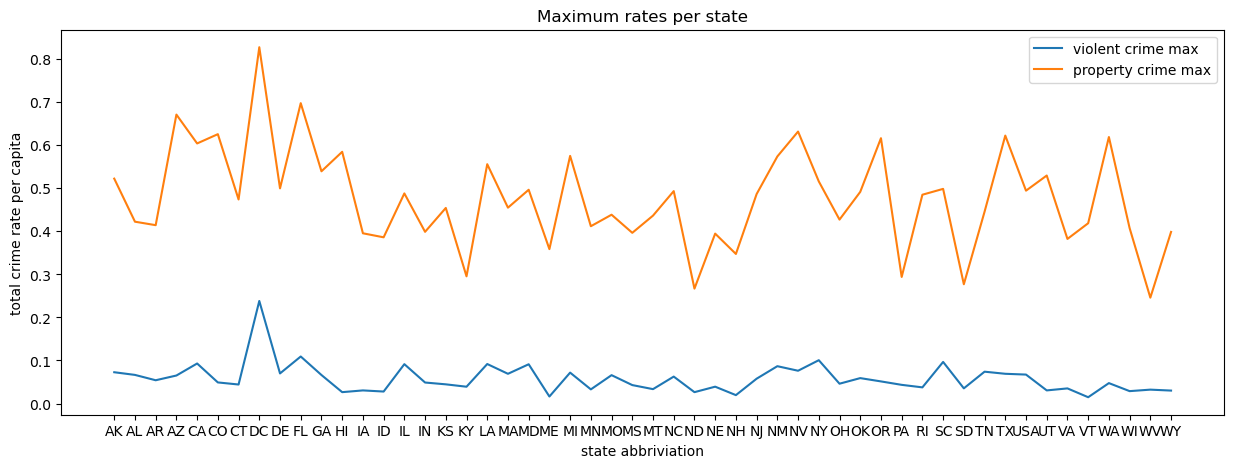

In [444]:
crimes['decade'] = (crimes['year'] // 10) * 10
by_decade_vc = crimes.pivot_table('violent_crime_per_capita', 'decade', 'state_abbr', aggfunc = sum)
by_decade_pc = crimes.pivot_table('property_crime_per_capita', 'decade', 'state_abbr', aggfunc = sum)
per_state_max_vc = by_decade_vc.max()
per_state_max_pc = by_decade_pc.max()
plt.figure(figsize=(15,5))
plt.plot(per_state_max_vc, label = "violent crime max")
plt.plot(per_state_max_pc, label = "property crime max")
plt.xlabel("state abbriviation")
plt.ylabel("total crime rate per capita")
plt.legend(loc="upper right");
plt.title("Maximum rates per state")

Interestingly, you can see that for both violent and property crime, DC has the highest rates. Even with the chart, and not knowing exactly when each state hit their max rates, DC is overwhelmingly at the top of both categories. We can look deeper into this though.

How do the two types of crime compare across the span of years within DC? I used bar charts to show the differences of each type of crime held under the umbrellas of violent and property crime, allowing for a better visual of what was recorded.

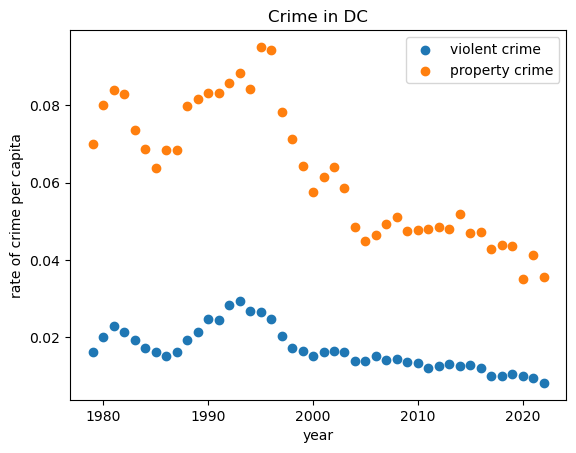

In [445]:
dc_crimes = crimes[crimes['state_abbr'] == 'DC']
plt.scatter(dc_crimes['year'], dc_crimes['violent_crime_per_capita'], label = "violent crime")
plt.scatter(dc_crimes['year'], dc_crimes['property_crime_per_capita'], label = "property crime")
plt.xlabel("year")
plt.ylabel("rate of crime per capita")
plt.title("Crime in DC")
plt.legend(loc="upper right");

From this scatter plot we can see that property related crimes were being commited at a much higher rate across the board compared to violent crimes, but this isn't really telling us much. What happens when we look at the specific categories held within violent and property crimes?

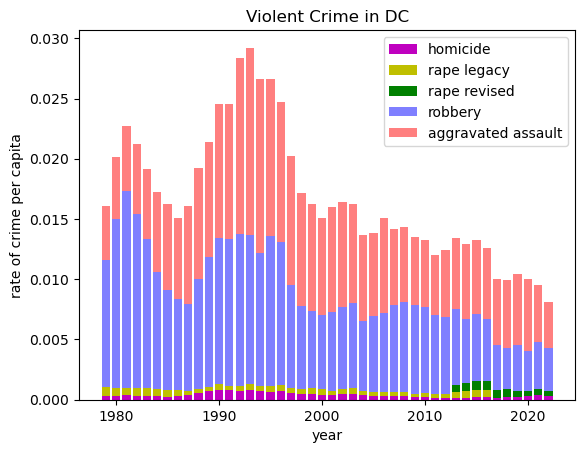

In [462]:
dc_h = dc_crimes['homicide_per_capita']
dc_rl = dc_crimes['rape_legacy_per_capita']
dc_rr = dc_crimes['rape_revised_per_capita']
dc_ro = dc_crimes['robbery_per_capita']
dc_aa = dc_crimes['aggravated_assault_per_capita']
year = dc_crimes['year']
plt.bar(year, dc_h, color = "m", label = "homicide")
plt.bar(year, dc_rl, bottom = dc_h, color = "y", label = "rape legacy")
plt.bar(year, dc_rr, bottom = dc_h+dc_rl, color = "g", label = "rape revised")
plt.bar(year, dc_ro, bottom = dc_h+dc_rl+dc_rr, color = "b", alpha = 0.5, label = "robbery")
plt.bar(year, dc_aa, bottom = dc_h+dc_rl+dc_rr+dc_ro, color = "r", alpha = 0.5, label = "aggravated assault")
plt.xlabel("year")
plt.ylabel("rate of crime per capita")
plt.title("Violent Crime in DC")
plt.legend(loc="upper right");

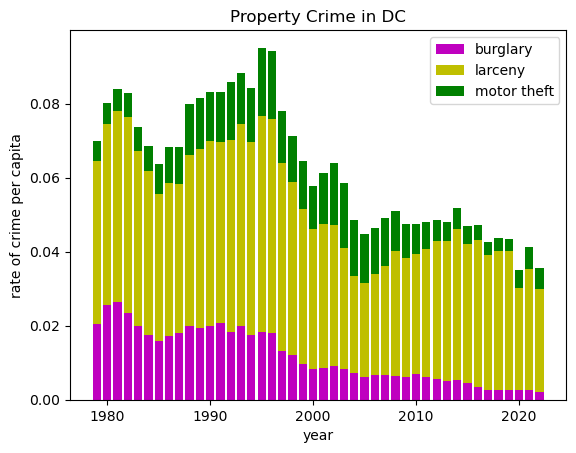

In [447]:
dc_b = dc_crimes['burglary_per_capita']
dc_l = dc_crimes['larceny_per_capita']
dc_mt = dc_crimes['motor_vehicle_theft_per_capita']
year = dc_crimes['year']
plt.bar(year, dc_b, color = "m", label = "burglary")
plt.bar(year, dc_l, bottom = dc_b, color = "y", label = "larceny")
plt.bar(year, dc_mt, bottom = dc_b+dc_l, color = "g", label = "motor theft")
plt.xlabel("year")
plt.ylabel("rate of crime per capita")
plt.title("Property Crime in DC")
plt.legend(loc="upper right");

* Based on the bar charts you can more clearly see what was happening throughout the years which led to those totals that are shown above. For violent crime that was a back and forth of which was more common, robbery or aggravated assault. However, with property crime larceny was always on top. Was this the case across the United States though or is DC a special case?

To make a comparison I plotted the same information but for the whole United States. There are some missing totals for this data from 2017 to 2020 but based on the graph we can infer that the trends of the data stayed pretty steady.

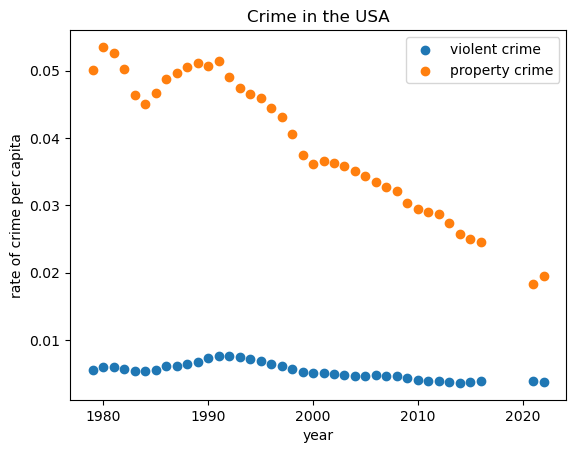

In [448]:
us_crimes = crimes[crimes['state_abbr'] == 'USA']
plt.scatter(us_crimes['year'], us_crimes['violent_crime_per_capita'], label = "violent crime")
plt.scatter(us_crimes['year'], us_crimes['property_crime_per_capita'], label = "property crime")
plt.xlabel("year")
plt.ylabel("rate of crime per capita")
plt.title("Crime in the USA")
plt.legend(loc="upper right");

Similary to DC, the United States has a lot more property crime than violent crime. it is also worth noting that there has been a decline of crime overall.

Looking at the plot, was there a noticable "winner" of what the most popular or least popular types of crime was across the US?

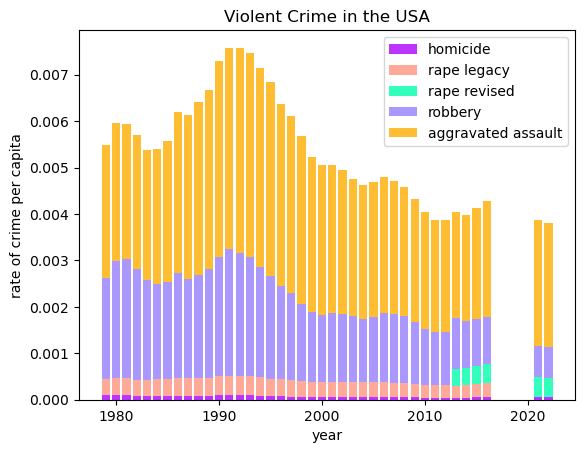

In [463]:
us_h = us_crimes['homicide_per_capita']
us_rl = us_crimes['rape_legacy_per_capita']
us_rr = us_crimes['rape_revised_per_capita']
us_ro = us_crimes['robbery_per_capita']
us_aa = us_crimes['aggravated_assault_per_capita']
year = us_crimes['year']
plt.bar(year, us_h, color = "#bd33ff", label = "homicide")
plt.bar(year, us_rl, bottom = us_h, color = "#ff5733", alpha = 0.5, label = "rape legacy")
plt.bar(year, us_rr, bottom = us_h+us_rl, color = "#33ffbd", label = "rape revised")
plt.bar(year, us_ro, bottom = us_h+us_rl+us_rr, color = "#5733ff", alpha = 0.5, label = "robbery")
plt.bar(year, us_aa, bottom = us_h+us_rl+us_rr+us_ro, color = "#ffbd33", label = "aggravated assault")
plt.xlabel("year")
plt.ylabel("rate of crime per capita")
plt.title("Violent Crime in the USA")
plt.legend(loc="upper right");

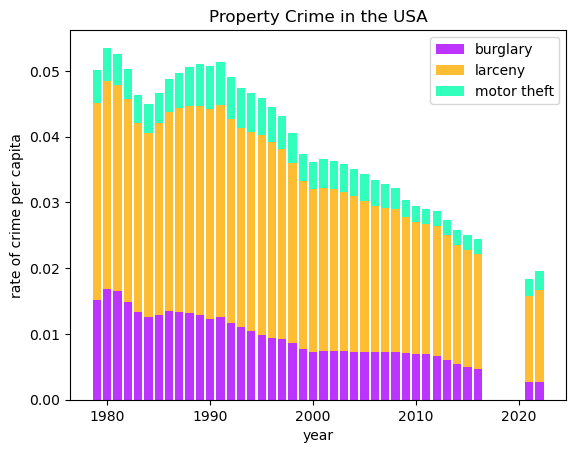

In [450]:
us_b = us_crimes['burglary_per_capita']
us_l = us_crimes['larceny_per_capita']
us_mt = us_crimes['motor_vehicle_theft_per_capita']
plt.bar(year, us_b, color = "#bd33ff", label = "burglary")
plt.bar(year, us_l, bottom = us_b, color = "#ffbd33", label = "larceny")
plt.bar(year, us_mt, bottom = us_b+us_l, color = "#33ffbd", label = "motor theft")
plt.xlabel("year")
plt.ylabel("rate of crime per capita")
plt.title("Property Crime in the USA")
plt.legend(loc="upper right");

For violent crime, there was a noticable higher rate of aggravated assault over other types of crime, which we did not see with the DC data, but both sets had peaks at similar times.
* For both findings, because the data of reported rape isn't complete it is hard to make a strong conclusion about anything. You can see there is a small increase of crime when the rape revised data is added, but the significance is outside of the scope for this project.

With property crimes, there was also the overarching "favorite" being larceny, yet there isn't as many small spikes in the overall rate.

After the peak around 1992, there is a pretty steady decrease in crime of all types in the US whereas DC would still have some small spikes in crimes being commited. It is worth noting that this data does not include everything. There are caveats that were given, like the killings caused by the 9/11 attack, are not a part of this set. 